In [98]:
!pip install nltk
!pip install sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
import nltk
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMRegressor
from xgboost.sklearn import XGBRegressor
!pip install catboost
from catboost import CatBoostRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [99]:
df = pd.read_csv('auto_costs (1).csv')
data = pd.DataFrame(df)
data.isnull().sum()




ID                  0
symboling           0
name                0
fueltypes           0
aspiration          0
doornumbers         0
carbody             0
drivewheels         0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [170]:
data.head(30)

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495.000
1,2,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500.000
2,3,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500.000
3,4,2,audi,gas,std,4,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950.000
4,5,2,audi,gas,std,4,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450.000
5,6,2,audi,gas,std,2,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250.000
6,7,1,audi,gas,std,4,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710.000
7,8,1,audi,gas,std,4,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920.000
8,9,1,audi,gas,turbo,4,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875.000
9,10,0,audi,gas,turbo,2,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.00,160,5500,16,22,17859.167


In [101]:
data['name'] = data['name'].apply(lambda x: x.split(' ')[0])
print(data)

      ID  symboling         name fueltypes aspiration doornumbers  \
0      1          3  alfa-romero       gas        std         two   
1      2          3  alfa-romero       gas        std         two   
2      3          1  alfa-romero       gas        std         two   
3      4          2         audi       gas        std        four   
4      5          2         audi       gas        std        four   
..   ...        ...          ...       ...        ...         ...   
200  201         -1        volvo       gas        std        four   
201  202         -1        volvo       gas      turbo        four   
202  203         -1        volvo       gas        std        four   
203  204         -1        volvo    diesel      turbo        four   
204  205         -1        volvo       gas      turbo        four   

         carbody drivewheels enginelocation  wheelbase  ...  enginesize  \
0    convertible         rwd          front       88.6  ...         130   
1    convertible     

In [102]:
data['name'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: name, dtype: int64

In [103]:
data['name'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [104]:
# models = {'maxda': 'mazda', 'Nissan': 'nissan','porcshce': 'porsche','toyouta': 'toyota','vokswagen': 'volkswagen', 'vw': 'volkswagen'}
# def clean_name(name):
#   for i in name:
#     if i in models.keys():
#       return models[i]
#     else:
#       return i
# clean_name(data['name'])


In [105]:
data['doornumbers'] = data['doornumbers'].map({'two': 2, 'four': 4})
data

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,4,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,4,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo,gas,std,4,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo,gas,turbo,4,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo,gas,std,4,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo,diesel,turbo,4,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [106]:
encode_data = pd.DataFrame() 
label = preprocessing.LabelEncoder()
list_encode_name = pd.DataFrame()
for x in  data.columns:
    if( data[x].dtype == 'object'):
        list_encode_name[x] =  data[x]
        encode_data[x] = label.fit_transform( data[x] )
    else:
        encode_data[x] = data[x]
encode_data

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,1,1,0,2,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,1,1,0,2,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,1,1,0,2,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,2,1,0,4,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,2,1,0,4,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,26,1,0,4,3,2,0,109.1,...,141,5,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,26,1,1,4,3,2,0,109.1,...,141,5,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,26,1,0,4,3,2,0,109.1,...,173,5,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,26,0,1,4,3,2,0,109.1,...,145,3,3.01,3.40,23.0,106,4800,26,27,22470.0


In [107]:
# Finding all the numerical columns in the dataset. 
numCols = data.select_dtypes(include=['int64','float'])

# Sorting the columns
numCols = numCols[sorted(numCols.columns)]

# Printing the columns
print(numCols.columns)

#columns_1 = numCols.drop('ID', 'symboling', 'name', 'fueltypes', 'aspiration', 'doornumbers', 'enginetype', 'fuelsystem', 'compressionratio', 'peakrpm', )

Index(['ID', 'boreratio', 'carheight', 'carlength', 'carwidth', 'citympg',
       'compressionratio', 'curbweight', 'doornumbers', 'enginesize',
       'highwaympg', 'horsepower', 'peakrpm', 'price', 'stroke', 'symboling',
       'wheelbase'],
      dtype='object')


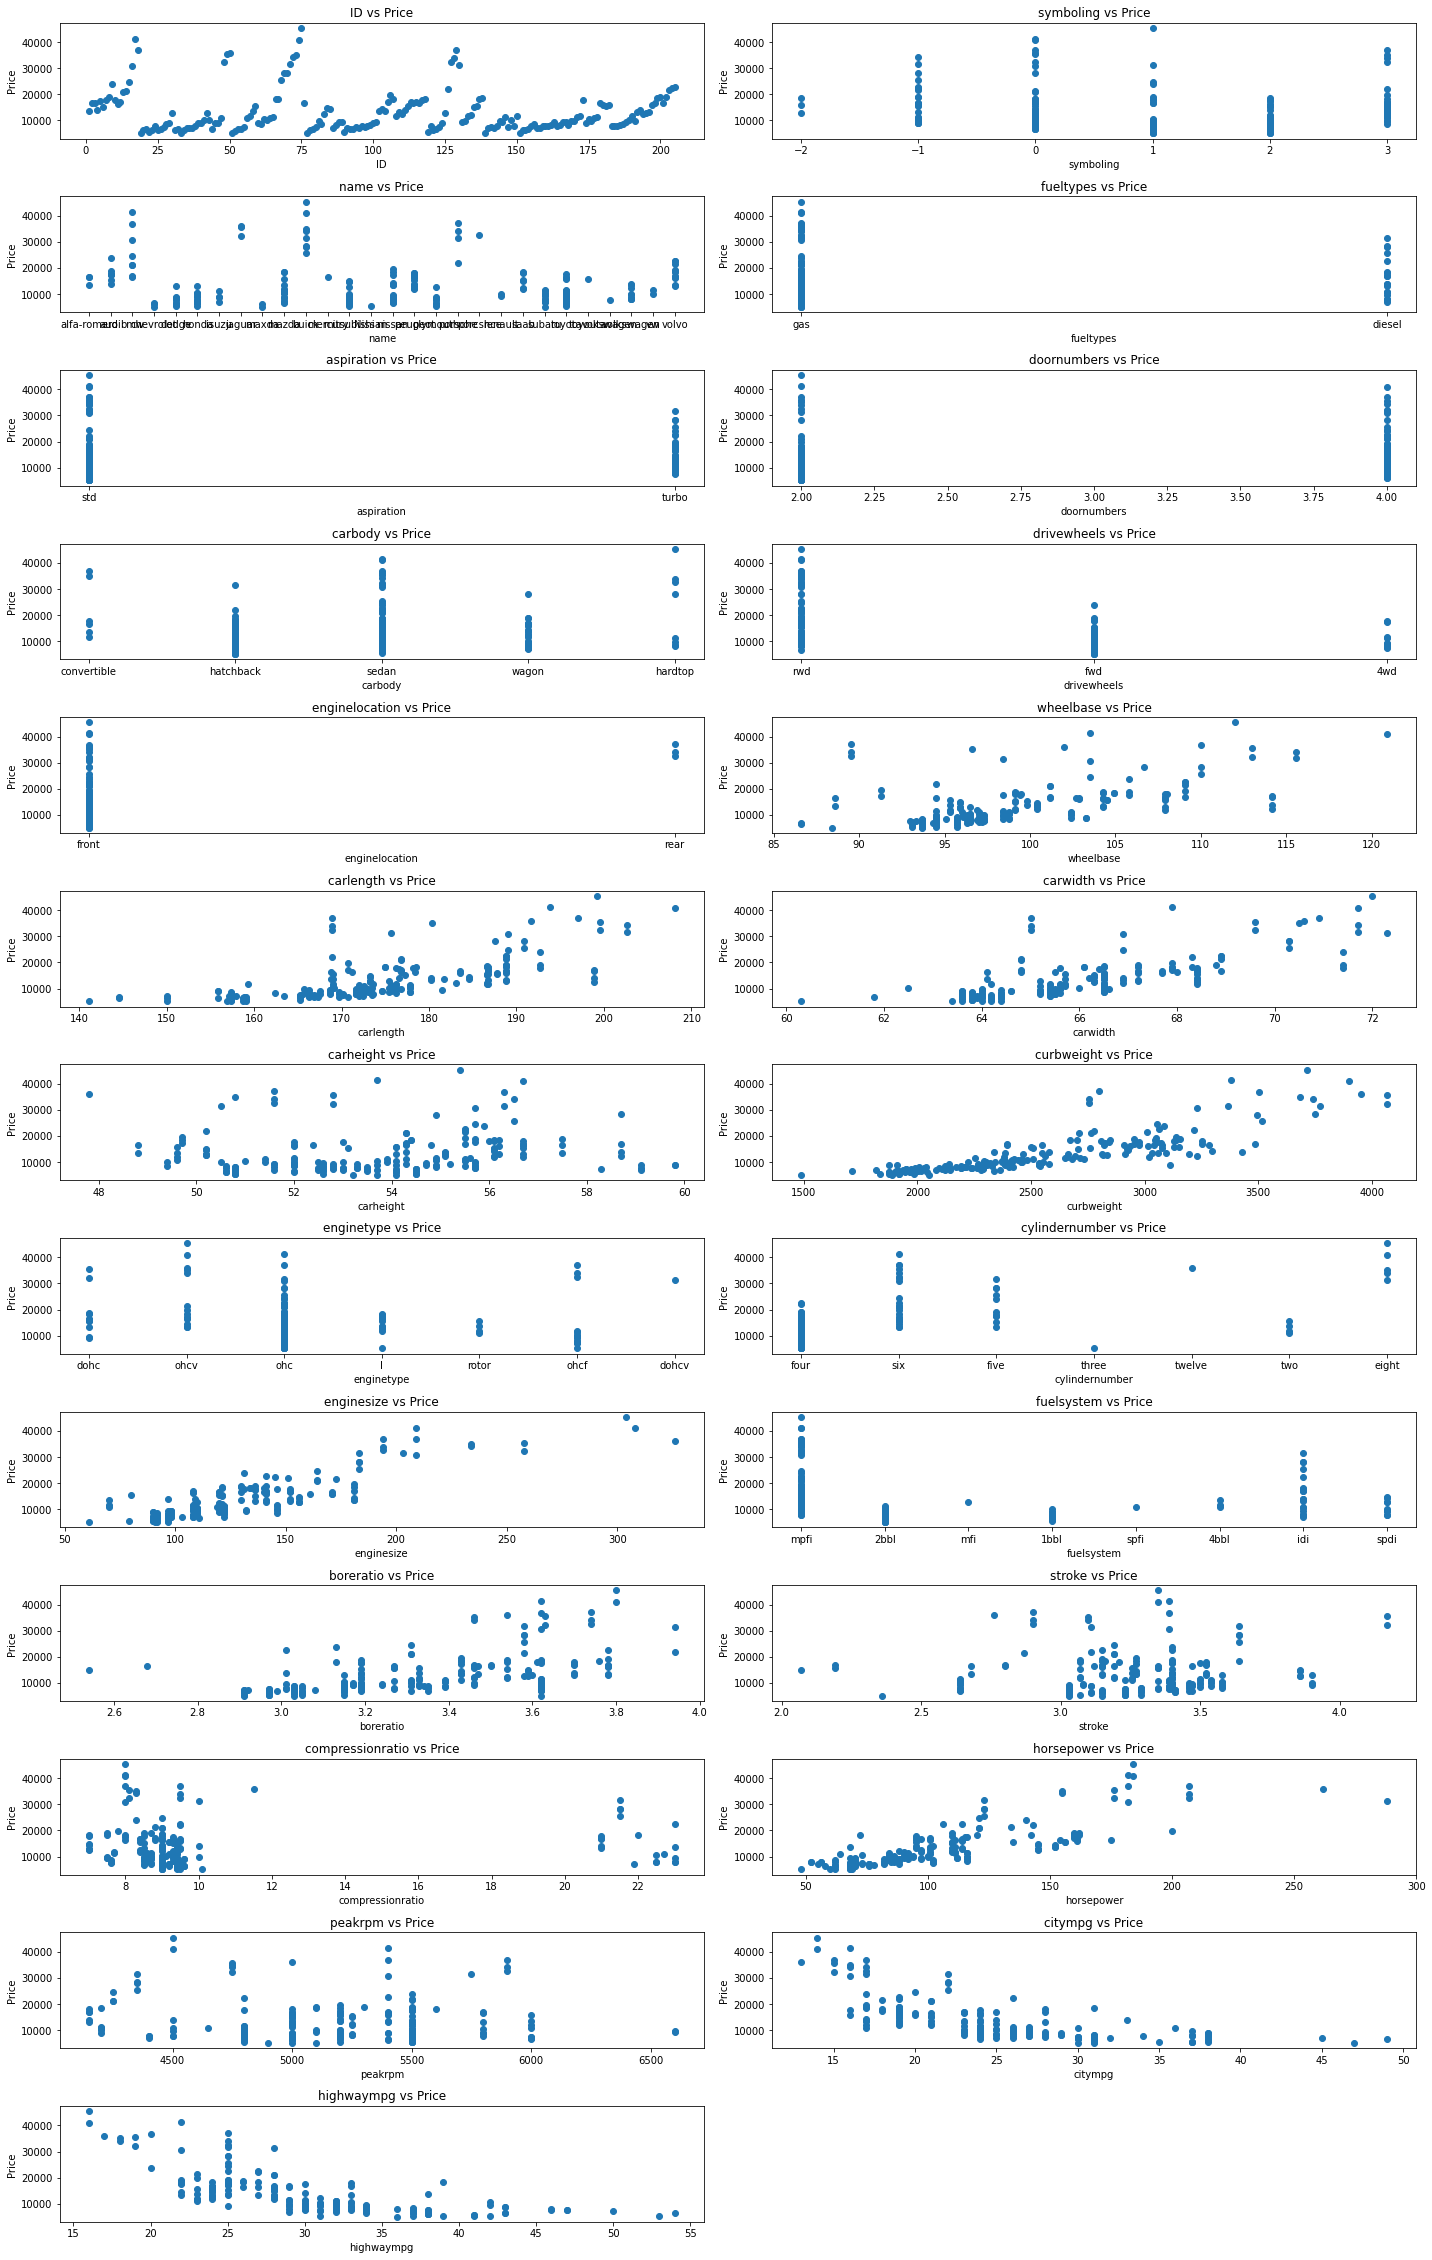

In [108]:
plt.figure(figsize=(20,60))

# Dropping the price column from the plot since we dont need to plot a scatter plot for price
numCols = data.drop('price',axis=1)

# running a for-loop to print the scatter plots for all numerical columns
for i in range(len(numCols.columns)):
    # Creating a sub plot
    plt.subplot(len(numCols.columns),2,i+1)
    # Creating a scatter plot
    plt.scatter(data[numCols.columns[i]],data['price'])
    # Assigning a title to the plot
    plt.title(numCols.columns[i]+' vs Price')
    # Setting the y label
    plt.ylabel('Price')
    # setting the x label
    plt.xlabel(numCols.columns[i])


# printing all the plots
plt.tight_layout()

In [109]:
# data['cylindernumber'] = data['cylindernumber'].map({'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'eight': 8})
# data['cylindernumber']

In [110]:
#corr_1 = data[['cylindernumber','price','wheelbase', 'carlength', 'carheight', 'carwidth', 'curbweight', 'enginesize','doornumbers', 'carlength' ,'compressionratio','horsepower', 'boreratio','peakrpm','citympg']]#.corr()
corr_2 = encode_data.corr()
corr_2

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
ID,1.000000,-0.151621,0.967084,-0.125568,0.067729,0.190352,0.098303,0.051406,0.051483,0.129729,...,-0.033930,0.204898,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.091524,0.194311,-0.059866,-0.664073,-0.596135,-0.041671,0.212471,-0.531954,...,-0.105790,0.091163,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
name,0.967084,-0.091524,1.000000,-0.063029,0.021522,0.164705,0.096025,-0.041645,0.052188,0.006009,...,-0.159540,0.138105,0.199395,-0.202581,0.095275,-0.089892,-0.138929,0.083559,0.095350,-0.231594
fueltypes,-0.125568,0.194311,-0.063029,1.000000,-0.401397,-0.191491,-0.147853,-0.132257,0.040070,-0.308346,...,-0.069594,0.041529,-0.054451,-0.241829,-0.984356,0.163926,0.476883,-0.255963,-0.191392,-0.105679
aspiration,0.067729,-0.059866,0.021522,-0.401397,1.000000,0.031792,0.063028,0.066465,-0.057191,0.257611,...,0.108217,0.288086,0.212614,0.222982,0.295541,0.241685,-0.183383,-0.202362,-0.254416,0.177926
doornumbers,0.190352,-0.664073,0.164705,-0.191491,0.031792,1.000000,0.680358,-0.098954,-0.137757,0.447357,...,0.020742,-0.015519,0.119258,-0.011082,0.177888,-0.126947,-0.247668,-0.012417,-0.036330,0.031835
carbody,0.098303,-0.596135,0.096025,-0.147853,0.063028,0.680358,1.000000,-0.155745,-0.277009,0.401362,...,-0.073352,-0.065079,0.010549,-0.015325,0.136243,-0.153928,-0.109643,0.031697,-0.007170,-0.083976
drivewheels,0.051406,-0.041671,-0.041645,-0.132257,0.066465,-0.098954,-0.155745,1.000000,0.147865,0.459745,...,0.524307,0.424686,0.481827,0.071591,0.127479,0.518686,-0.039417,-0.449581,-0.452220,0.577992
enginelocation,0.051483,0.212471,0.052188,0.040070,-0.057191,-0.137757,-0.277009,0.147865,1.000000,-0.187790,...,0.196826,0.105971,0.185042,-0.138455,-0.019762,0.317839,0.198461,-0.153487,-0.102026,0.324973
wheelbase,0.129729,-0.531954,0.006009,-0.308346,0.257611,0.447357,0.401362,0.459745,-0.187790,1.000000,...,0.569329,0.384601,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816


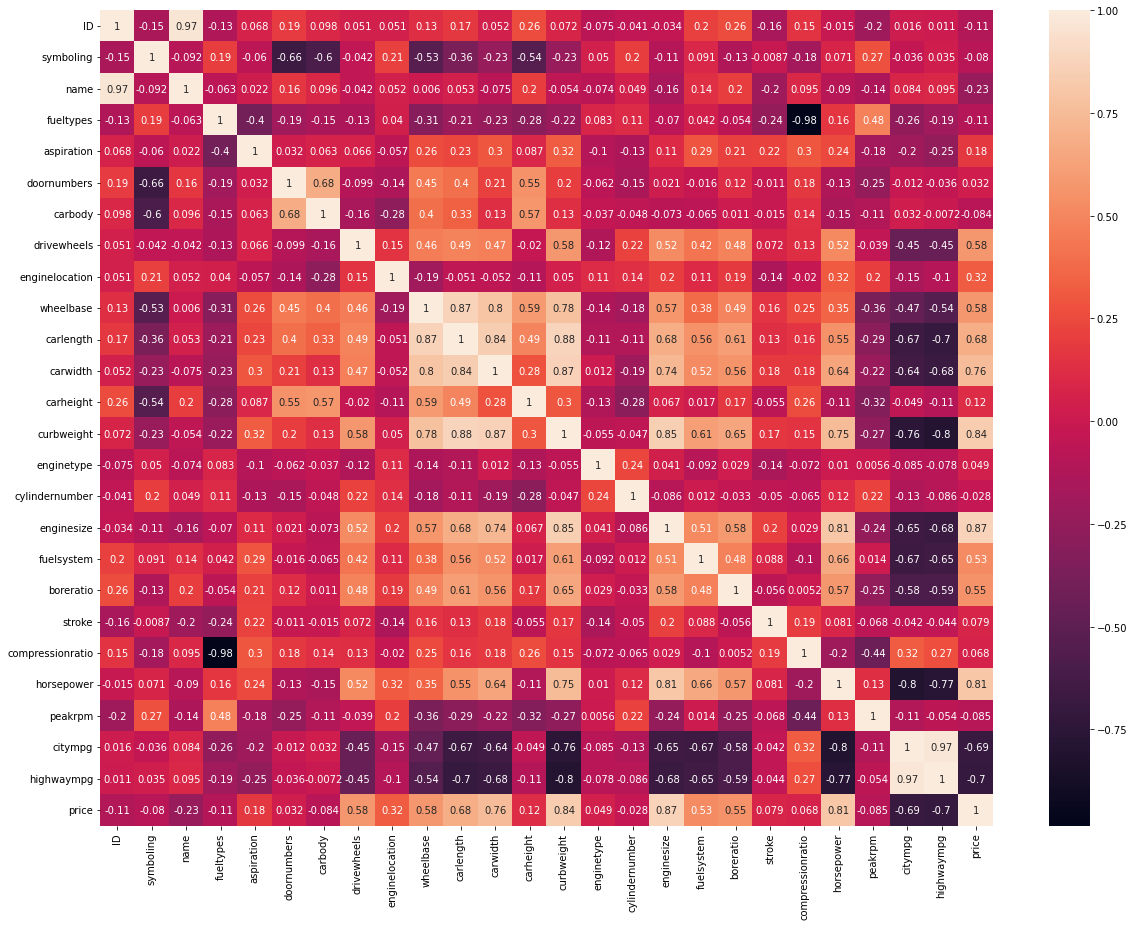

In [126]:
plt.figure(figsize =(20,15))
ax = sns.heatmap(corr_2, annot=True,)


In [112]:
from sklearn import linear_model 
from sklearn.metrics import r2_score 
from sklearn.linear_model import LinearRegression
 

x = encode_data.drop('price', axis=1)
y = encode_data.price
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.3, random_state=16)
x

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,1,3,1,1,0,2,0,2,0,88.6,...,2,130,5,3.47,2.68,9.0,111,5000,21,27
1,2,3,1,1,0,2,0,2,0,88.6,...,2,130,5,3.47,2.68,9.0,111,5000,21,27
2,3,1,1,1,0,2,2,2,0,94.5,...,3,152,5,2.68,3.47,9.0,154,5000,19,26
3,4,2,2,1,0,4,3,1,0,99.8,...,2,109,5,3.19,3.40,10.0,102,5500,24,30
4,5,2,2,1,0,4,3,0,0,99.4,...,1,136,5,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,26,1,0,4,3,2,0,109.1,...,2,141,5,3.78,3.15,9.5,114,5400,23,28
201,202,-1,26,1,1,4,3,2,0,109.1,...,2,141,5,3.78,3.15,8.7,160,5300,19,25
202,203,-1,26,1,0,4,3,2,0,109.1,...,3,173,5,3.58,2.87,8.8,134,5500,18,23
203,204,-1,26,0,1,4,3,2,0,109.1,...,3,145,3,3.01,3.40,23.0,106,4800,26,27


In [113]:
madel_1 = LinearRegression().fit(x_train, y_train) # practice the model
madel_1

LinearRegression()

In [114]:
madel_2 = LGBMRegressor().fit(x_train, y_train)
madel_2

LGBMRegressor()

In [115]:
madel_3 = XGBRegressor().fit(x_train, y_train)
madel_3

[05:34:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
madel_4 = CatBoostRegressor().fit(x_train, y_train)

In [117]:
madel_5 = KernelRidge().fit(x_train, y_train)

In [118]:
madel_6 = ElasticNet().fit(x_train, y_train)

In [119]:
madel_7 = BayesianRidge().fit(x_train, y_train)

In [120]:
madel_8 = GradientBoostingRegressor().fit(x_train, y_train)

In [121]:
list_madels = [madel_1, madel_2, madel_3, madel_4, madel_5, madel_6, madel_7, madel_8]  # add the model to the list
rmse_test =[] # empty list for rmse
r2_test =[]   # empty list for r2

 # check each model and add the result to the empty lists
for madel in list_madels:
  predict = madel.predict(x_test)
  rmse_test.append( round( np.sqrt( mean_squared_error(y_test, predict) ), 4 ) )
  r2_test.append( round(r2_score(y_test, predict) , 4 ) )

 # passing the result to a dataframe
madel_name = "LinearRegression LGBMRegressor XGBRegressor CatBoostRegressor KernelRidge ElasticNet BayesianRidge GradientBoostingRegressor".split()
result = pd.DataFrame({'RMSE':rmse_test,'R2_Test':r2_test}, index = madel_name)
result

,RMSE,R2_Test
LinearRegression,2593.2496,0.9026
LGBMRegressor,2244.6409,0.9270
XGBRegressor,1376.2814,0.9726
CatBoostRegressor,1498.2795,0.9675
KernelRidge,2759.2508,0.8897
ElasticNet,2849.4645,0.8824
BayesianRidge,2998.8970,0.8697
GradientBoostingRegressor,1739.3702,0.9562


In [122]:
 count = data['name'].value_counts()

[Text(0, 0.5, 'Frequency of fuel type'), Text(0.5, 0, 'Fuel Type')]

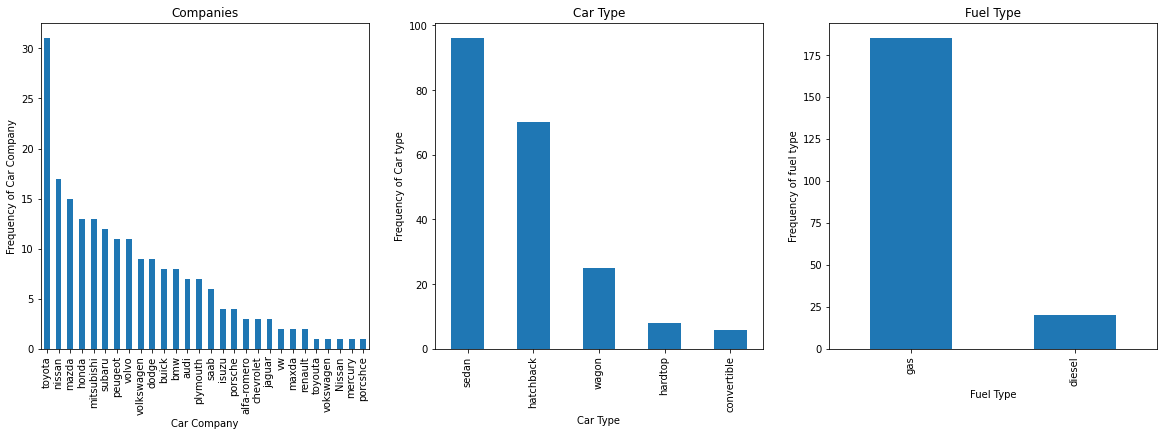

In [123]:
plt.figure(figsize = (20,6))

plt.subplot(1,3,1)
plt1 = count.plot(kind='bar')
plt.title('Companies')
plt1.set(xlabel = 'Car Company', ylabel='Frequency of Car Company')

plt.subplot(1,3,2)
plt1 = data.carbody.value_counts().plot(kind='bar')
plt.title('Car Type')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')

plt.subplot(1,3,3)
plt1 = data.fueltypes.value_counts().plot(kind='bar')
plt.title('Fuel Type')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

In [167]:
import pandas
from sklearn import linear_model

df = pandas.read_csv("auto_costs (1).csv")

X = df[['carlength','carheight', 'curbweight', 'enginesize', 'stroke', 'compressionratio','horsepower', 'peakrpm', ]]
y = df['price']

regr = linear_model.LinearRegression()
regr.fit(X, y)

#predict the CO2 emission of a car where the weight is 2300kg, and the volume is 1300cm3:
predictedCO2 = regr.predict([[168.8,  48.8, 2548, 130, 2.68, 9, 111, 5000,]])
print()
print(predictedCO2)


[14034.98665557]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [142]:
encode_data['doornumbers']

0      2
1      2
2      2
3      4
4      4
      ..
200    4
201    4
202    4
203    4
204    4
Name: doornumbers, Length: 205, dtype: int64